#### <a id='top'></a>

# Homework 3: Conditional Probability and Random Choice 
***

**Name**: Jonathan Phouminh

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 21**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

Collaborators: 

   Zach Chomalla
   Bao Nguyen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

## (25 pts) Problem 1: Theory (Independence)

In the popular video game series Pokémon, players conduct battles between their pokémon (creatures). In the main series of games, these battles are [turn-based](#https://en.wikipedia.org/wiki/Turns,_rounds_and_time-keeping_systems_in_games#Turn-based), similar to a game of checkers, chess, or Go.

Let's create a new set of rules for a pokémon duel so they don't have to battle until they faint. For our example, we will look at Pikachu vs. Eevee. Pikachu has a higher base Speed, so they will get to move first.

* The duel is composed of an unknown number of rounds (same as Pokémon).
* Each round is still turn-based, it consists of Pikachu trying to strike Eevee, then Eevee trying to strike Pikachu.
* If Pikachu manages to strike Eevee, then Pikachu is awarded a point, and similarly if Eevee manages to strike Pikachu, then Eevee is awarded a point.
* If a round ends in a tie, then Pikachu and Eevee proceed to another round. If a round ends with one pokémon scoring a point but the other one does not, then the pokémon who scored a point wins the duel.

Let $U$ be the event that "Picachu wins the duel", $F$ be the event that "the duel ends after the first round of strikes", and $C$ be the event that "the duel continues after the first round of strikes".  Suppose that the result of one strike is independent of the other strikes, Picachu successfully lands their strikes with probability $p$ (based on their accuracy and Eevee's evasiveness), and Eevee similarly lands their strikes with probability $q$.

**Part A**: The duel will continue until Picachu or Eevee wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual strikes by $H$ for a hit and $M$ for a miss. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

HINT: Remember that Pikachu has the first strike in each round!

$\Omega$ = { $H_pH_E$ , $H_pM_E$ , $M_pH_E$, $M_pM_E$ }

**Part B**: Determine $P(U \mid F)$ in terms of $p$ and $q$.

If we know that if the round ends in the first round then our sample space becomes 

L = { $H_pM_e$, $M_pE_e$ }
        
We are interested in case where Pikachu hits and Eevee misses, so we just need to determine that probability.

P(U | F) = P( P(p) $\cap$ P(1-q))  where p is pikachu hitting and 1-q representing Eevee missing. 

**Part C**: Explain why events $C$ and $U$ are independent. 

Will show that C and U are independant by explaining why the following holds
P( U $\cap$ C ) = P(U) * P(C)

The probability of pikachu winning any given round is equal to the probability of pikachu landing a strike, P(p), multiplied by the probability of Eevee missing the strike in the same round, P(1-q). Given that the round advances, the sample space is still the same because there is nothing chaning the likelyhood of pikachu striking and Eevee missing. Therefore, we know that the two events are independent because the equation above holds. 

**Part D**: Use the Law of Total Probability to show that $P(U) = p(1-q) + (2pq - p - q +1) ~P(U \mid C)$. 

**Typeset your solution for Problem 1D in this cell or cells.**

**Part E**: Use the fact from **Part B** that $P(U \mid C) = P(U)$ to determine $P(U)$ in terms of $p$ and $q$.

If we know that the probability of pikachu winning remains the same in any given round then all we would have to know is the probability of pikachu hitting in that round multiplied by the probability of Eeevee missing..

P(U) = P(p) * P(1-q)

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

The answers from B and E are the same because we know that the probability of Pikachu winning is independent of any g
iven round, the question in Part B just happened to ask for the probability given the game ended in the first round. 

**Part G**: Explain the significance of the solution technique for $P(U)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

**Typeset your solution for Problem 1G in this cell or cells.**

[Back to top](#top)
<a id='p2'></a>

## (30 pts) Problem 2: Computation (Joker Poker Hands)
***


A common example for discrete counting and probability questions are poker hands.  Consider using a standard 52-card playing deck, with card faces `[A,2,3,4,5,6,7,8,9,10,J,Q,K]` across the standard 4 suits: `[C,D,H,S]`.  For the markdown portions of this problem, you may leave your answer in terms of a ratio of products, but you should simplify away any combinatoric notation such as ${n \choose k}$ or $P(n,k)$.

**Part A:**

Suppose we draw 5 cards at random from the deck.  What is the probability that we have a "3 of a kind:" a hand with 3 copies of one face card and the other two cards unmatched?

We solve this by determining all the different ways of achieving a 3 of a kind hand divided by the all the possible 5 card hands. 

First determine, the amount of different ways to draw three cards that match and we get 

   P(13,1) * P(4,3)       , these are all the different combinations of a 3 of a kind hand with 4 different suits
   
next, we determine the count of different combinations for the remaining two cards of the 5 card hand

 P(12, 2) * P(4,1) * P(4,1), combination of choosing two cards not matching the our three of a kind card with 4 suits

$P(3ofKind) = \frac{P(13,1)P(4,3)P(12,2)P(4,1)P(4,1)}{P(52,5)}$

**Part B:**

Suppose we add a single "Joker" card to the deck.  The Joker may serve as a copy of any card in the deck, including one already in our hand.  

Suppose we draw 5 cards at random from the deck.  What is the probability that we now have "3 of a kind?"  This should now include hands with 2 copies of one face and a joker (and the other 2 as non-paired cards).

If we add a single joker as a wild card to the deck, the problem changes in a few ways.

1. We must take into account that the deck has increased by one size
2. The total probabiliy of landing a three of a kind becomes a sum of the combinations of 
    - Getting a three of a kind without the joker
    - Getting a three of a kind with the assumption that we did have a joker in hand
    
So we have 

$\frac{P(13,1) * P(4,3) * P(12,2) * P(4,1) * P(4,1)}{P(53, 5)}$ + $\frac{P(13,1) * P(4,2) * P(12,2) * P(4,1) * P(4,1)}{P(53, 5)}$

Note we assumed we had drawn a joker when we said P(4,2) because we really only need to choose 2 of the 4 other suit values for some card we drew in P(13,1).

**Part C:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed.  Verify that the result is consistent with your answer to part A.

In [2]:
import random
# will represent cards with just numerical values 
# 0 = ace , 11 = jack , 12 = queen , 13 = king, 1 is not placed in the deck
deck = []

def loadDeck():
    for i in range(0,14):
        for j in range(4):
            if i == 1:
                break
            deck.append(i)
        
# helper function catch a full house hand
def checkFullHouse(givenHand, indexes):
    hand = givenHand
    if len(indexes) > 3:   # full house
        return False 
    return True
   
# helper function to help determine 3 of a kind 
def hasThreeOfAKind(hand):
    originalHand = hand.copy()
    ArrayofMatches = [] 
    ArrayofIndexes = []
    for i in range(len(hand)):
        ArrayofMatches.append(hand[i])
        j = i + 1
        while j != 5:   # go through and just grab all the matches
            if hand[j] == ArrayofMatches[0]:
                ArrayofMatches.append(hand[j])
                ArrayofIndexes.append(hand[j])
            j = j + 1
        if len(ArrayofMatches) > 3: # quads
            return False
        if len(ArrayofMatches) == 3:  # make sure we check the rest of the array quads
            ArrayofIndexes.append(hand[i])
            return checkFullHouse(originalHand, ArrayofIndexes)
        ArrayofMatches = []
        indexOfMatches = []
    return False
    
def draw():
    COUNTER = 0
    DRAW_COUNT = 10000
    
    loadDeck()
    shuffledDeck = deck
    
    for i in range(DRAW_COUNT):
        # shuffle the deck 
        random.shuffle(shuffledDeck)
        random.shuffle(shuffledDeck)
        ret = False
        currentHand = []
        for i in range(5):  # draw first 5 cards of shuffled deck
            currentHand.append(shuffledDeck[i])
        ret = hasThreeOfAKind(currentHand)
        if ret == True:
            COUNTER = COUNTER + 1
    print(COUNTER, "three of a kinds were found")
    rate = 100 * (COUNTER / DRAW_COUNT)
    print("3 of a kind rate: ", rate, "%")
    
draw()

200 three of a kinds were found
3 of a kind rate:  2.0 %


**Part D:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck where one "Joker" card has been added.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed.   Verify that the result is consistent with your answer to part B.

In [3]:
import random
# will represent cards with just numerical values 
# 0 = ace , 11 = jack , 12 = queen , 13 = king, 1 is not placed in the deck
deck = []

def loadDeck2():
    for i in range(0,14):
        for j in range(4):
            if i == 1:
                break
            deck.append(i)
            
# helper function catch a full house hand
def checkFullHouse2(givenHand, indexes):
    hand = givenHand
    if len(indexes) > 3:   # full house
        return False 
    return True

# helper function to help determine 3 of a kind 
def hasThreeOfAKind2(hand):
    originalHand = hand.copy()
    ArrayofMatches = [] 
    ArrayofIndexes = []
    ArrayofJokers = []
    
    # scan for jokers 
    for card in hand:
        if card == 14:
            ArrayofJokers.append(card)
    
    for i in range(len(hand)):
        ArrayofMatches.append(hand[i])
        j = i + 1
        while j != 5:   # go through and just grab all the matches
            if hand[j] == ArrayofMatches[0]:
                ArrayofMatches.append(hand[j])
                ArrayofIndexes.append(hand[j])
            j = j + 1
        if len(ArrayofMatches) > 3: # quads
            return False
        if len(ArrayofMatches) == 3:  # make sure we check the rest of the array quads
            ArrayofIndexes.append(hand[i])
            return checkFullHouse2(originalHand, ArrayofIndexes)
        if len(ArrayofMatches) == 2 and len(ArrayofJokers) == 1: # auto match
            return True
        ArrayofMatches = []
        indexOfMatches = []
    return False
        

def draw2():
    COUNTER = 0
    DRAW_COUNT = 10000
    
    loadDeck()
    shuffledDeck = deck
    shuffledDeck.append(14)   # adding the joker 
    
    for i in range(DRAW_COUNT):
        # shuffle the deck 
        random.shuffle(shuffledDeck)
        random.shuffle(shuffledDeck)
        ret = False
        currentHand = []
        for i in range(5):  # draw first 5 cards of shuffled deck
            currentHand.append(shuffledDeck[i])
        ret = hasThreeOfAKind2(currentHand)
        if ret == True:
            COUNTER = COUNTER + 1
    print(COUNTER, "three of a kinds were found")
    rate = 100 * (COUNTER / DRAW_COUNT)
    print("3 of a kind rate: ", rate, "%")
    
draw2()

483 three of a kinds were found
3 of a kind rate:  4.83 %


**Part E:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck with four "Joker" cards added.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed. (NB: 3 unpaired cards and 2 Jokers is the new case of "3 of a kind".)

In [4]:
import random
# will represent cards with just numerical values 
# 0 = ace , 11 = jack , 12 = queen , 13 = king, 1 is not placed in the deck
deck = []

def loadDeck3():
    for i in range(0,14):
        for j in range(4):
            if i == 1:
                break
            deck.append(i)
            
# helper function catch a full house hand
def checkFullHouse3(givenHand, indexes):
    hand = givenHand
    if len(indexes) > 3:   # full house
        return False 
    return True

# helper function to help determine 3 of a kind 
def hasThreeOfAKind3(hand):
    originalHand = hand.copy()
    ArrayofMatches = [] 
    ArrayofIndexes = []
    ArrayofJokers = []
    
    # scan for jokers 
    for card in hand:
        if card == 14:
            ArrayofJokers.append(card)
    
    for i in range(len(hand)):
        ArrayofMatches.append(hand[i])
        j = i + 1
        while j != 5:   # go through and just grab all the matches
            if hand[j] == ArrayofMatches[0]:
                ArrayofMatches.append(hand[j])
                ArrayofIndexes.append(hand[j])
            j = j + 1
        if len(ArrayofMatches) > 3: # quads
            return False
        if len(ArrayofMatches) == 3:  # make sure we check the rest of the array quads
            ArrayofIndexes.append(hand[i])
            return checkFullHouse2(originalHand, ArrayofIndexes)
        if len(ArrayofMatches) == 2 and len(ArrayofJokers) >= 1: # pair and a joker
            return True
        if (len(ArrayofJokers) >= 2):  # automatic 3 of kind
            return True
        ArrayofMatches = []
        indexOfMatches = []
        ArrayofJokers = []
    return False
        

def draw3():
    COUNTER = 0
    DRAW_COUNT = 10000
    
    loadDeck()
    shuffledDeck = deck
    shuffledDeck.append(14)   # adding the joker 
    shuffledDeck.append(14)
    shuffledDeck.append(14)
    shuffledDeck.append(14)
    for i in range(DRAW_COUNT):
        # shuffle the deck 
        random.shuffle(shuffledDeck)
        random.shuffle(shuffledDeck)
        ret = False
        currentHand = []
        for i in range(5):  # draw first 5 cards of shuffled deck
            currentHand.append(shuffledDeck[i])
        ret = hasThreeOfAKind3(currentHand)
        if ret == True:
            COUNTER = COUNTER + 1
    print(COUNTER, "three of a kinds were found")
    rate = 100 * (COUNTER / DRAW_COUNT)
    print("3 of a kind rate: ", rate, "%")
    
draw3()

927 three of a kinds were found
3 of a kind rate:  9.27 %


[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Simulation
*** 

In this problem you will write some code to simulate the movement of budding Data Scientist Skyler - founder of infamous Skynet - as they navigate their way through the Engineering Center Lobby between classes.  Skyler has 10 minutes to navigate the labryinthine space below:

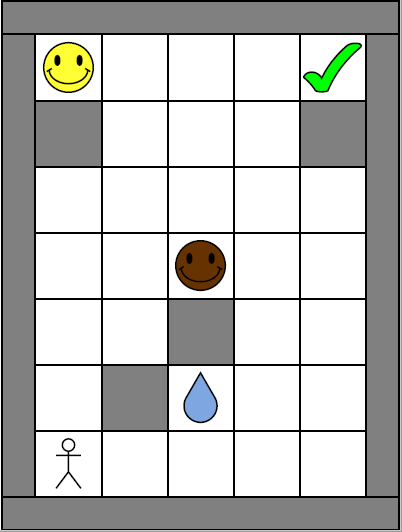

Skyler starts at the bottom left (SW) corner, a square we will refer to as $(0,0)$, and is trying to reach their next class in the top right (or NE) corner, a square at (4,6) using a standard cartesian system.

Skyler, unfortunately, is very disoriented and their movement is partly random.  1/3 of the time Skyler will try to walk North; 1/3 of the time Skyler will try to walk East, and the rest of the time Skyler will split evenly between South and West.

Your goal is to figure out what the probability is that Skyler makes it to (4,6) before running out of time, with the following hazards:

 - Skyler walks at a standard rate of 10 seconds per tile.  If Skyler walks into one of the dark-shaded walls or pillars, they remain where they started, but it still takes 10 seconds.

 - Someone spilled a foul-smelling energy drink at (2,1).  If Skyler moves into the tile in (2,1), they are completely grossed out.  They move back to the start at (0,0) and spend a little time cleaning their shoes, losing 60 additional seconds beyond the time to originally move into (2,1).
 
 - Skyler's data science professor is drinking coffee at (2,3), and Skyler hasn't turned in their homework for a week and a half.  If Skyler walks to that tile, they suffer through some tedious conversation and then shuffle *backwards* from where they came by an extra tile, so if they encountered the professor in a movement from (1,3) to (2,3) they would recoil back to (0,3).  This entire process takes 90 seconds, including all movement.
 
 - Skyler's best friend and coding collaborator is at (0,6).  Should Skyler walk there, they will engage in a lengthy conversation, taking 120 seconds, including all movement.



<br>

**Part A**: Complete the function sky_step below. The function should simulate one step of Skyler's.  It should take as arguments the Skyler's current location on the board as well as the the time elapses, and return Skyler's new location and time elapses after the movement has completed. Note that if Skyler runs out of time, you should return 310 and not any additional wasted time.

In [54]:
from random import randrange
from copy import deepcopy

# true means move was in bounds
# false means move was out of bounds
def checkBounds(currentLocation):
    # [x,y]
    if currentLocation[0] >= 0 and currentLocation[0] <= 4:    
        if currentLocation[1] >= 0 and currentLocation[1] <= 6:
            return True
        return False
    return False


# Return semantics  (y,x) coordinate position
# move foward = take current position + (-1,0)
# move backwards = take current position + (1,0)
# move east = take current position + (0, -1)
# move west = take current position + (0, 1)
def makeMove(currentLocation):
    number = randrange(100)
    # move north
    if number < 33: 
        newY = currentLocation[0] + 1
        newX = currentLocation[1]
        return [newX,newY]
    # move south
    elif number >= 33 and number < 65:
        newY = currentLocation[0] - 1
        newX = currentLocation[1] 
        return [newX,newY]
    # move east
    elif number >= 65 and number < 83:
        newY = currentLocation[0]
        newX = currentLocation[1] - 1 
        return [newX,newY]
    # move west 
    else:
        newY = currentLocation[0]
        newX = currentLocation[1] + 1
        return [newX,newY]

def checkEvents(currentStep):
    # hitting inner walls
    if currentStep == [1,1] or currentStep == [2,2] or currentStep == [0,5] or currentStep == [4,5] and checkBounds(currentStep) == False:
        return "hit wall"

    # water spill event,   return 1200 to represent sending them back to location 0,0 and subtracting 60 
    if currentStep == [2,1]:
        # send them back to (0,0) and waste 120 seconds
        return "water spill" 

    # coffee spill event
    if currentStep == [2,3]:
        # walk back two spaces and lose 90 seconds, which way does she walk back? Keep track of previous? 
        return "coffee spill"

    # game winning tile
    if currentStep == [4,6]:
        # end the game 
        return "WINNER"

    # movement is ok and just proceed with the next 
    return "NONE"

def walkbacktwo(originalSpot, newSpot):
    originalX = originalSpot[0]
    originalY = originalSpot[1]
    
    newX = newSpot[0]
    newY = newSpot[1]
    
    # check if they came from the north
    if originalY > newY:
        replacementY = originalY + 1
        return [originalX, replacementY]
    
    if originalX > newX:
        replacementX = originalX + 1
        return [replacementX, originalY]
    
    replacementX = originalX - 1
    return [replacementX, originalY]
    
   
# function calls the movement methods, and checks to see if the move is valid, if valid, 
# return the move to the sim
def sky_step(location, time):
    original_location = deepcopy(location)
    original_time = deepcopy(time)
    stepTaken = makeMove(location)
    event = checkEvents(stepTaken)
    
    if (event == "hit wall"):
        newSpot = original_location
        newTime = original_time + 10
        return newSpot, newTime
    elif (event == "water spill"):
        newSpot = [0,0]
        newTime = original_time + 120
        return newSpot, newTime
    elif (event == "coffee spill"):
        newSpot = walkbacktwo(original_location, stepTaken)
        newTime = original_time + 90
        return newSpot, newTime
    elif (event == "WINNER"):
        newSpot = stepTaken
        newTime = original_time + 10
        return newSpot, newTime
    elif (event == "NONE"):
        newSpot = stepTaken
        newTime = original_time + 10
        return newSpot, newTime

**Part B**: Use your function from **Part A** to simulate at least 10000 of Skyler's 10-minute trips through the Engineering Lobby and make a frequency histogram of the Skyler's time elapsed at the end of your simulation (including instances where they did not make it in time).

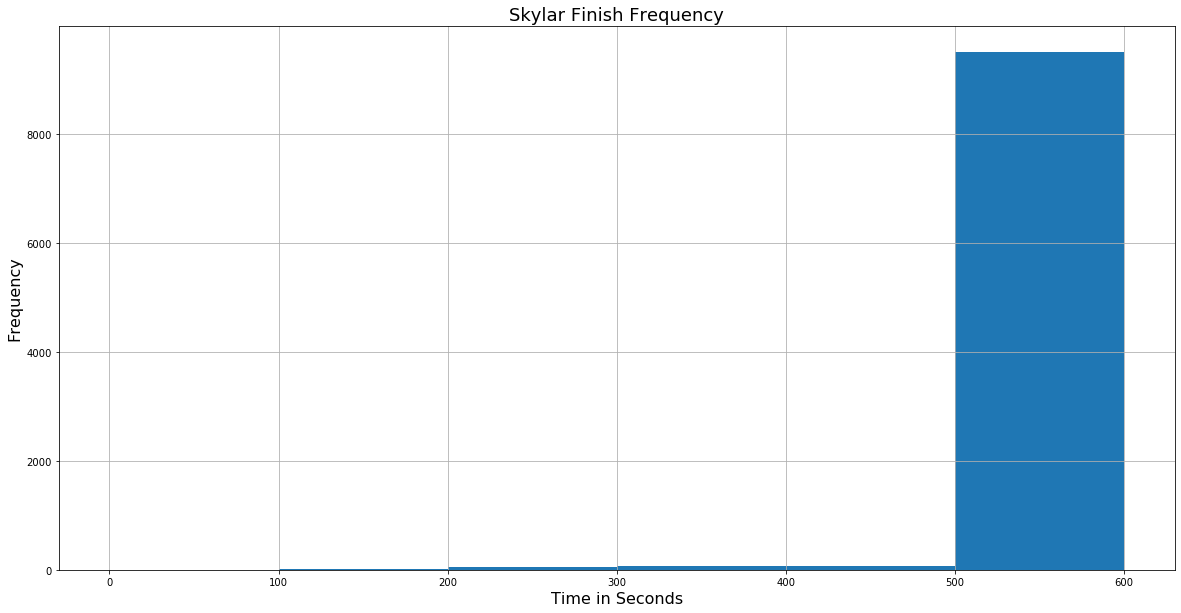

In [85]:
finishing_times = []

def plotHistogram(finishing_times):
    series = pd.Series(finishing_times)

    my_bins = range(0, 700, 100)
    fig, ax = plt.subplots(figsize=(20,10))

    plt.hist(series, bins = my_bins)
    ax.set_title("Skylar Finish Frequency", fontsize = 18)
    ax.set_ylabel("Frequency", fontsize = 16)
    ax.set_xlabel("Time in Seconds", fontsize = 16)
    ax.grid(alpha=1)

    
def simulate():
    for i in range(10000):
        currenttime = 0
        currentposition = [0,0]
        while (currenttime != 600):
            ret = sky_step(currentposition,currenttime)
            currentposition = ret[0]
            currenttime = ret[1]
            if ret[0] == [4,6]:
                timeElapsed = ret[1]
                break
            if currenttime >= 600:
                break
            
        finishing_times.append(currenttime)

    plotHistogram(finishing_times)
simulate()

**Part C**: Use your code from **Part A** to estimate the probability that Skyler makes it to class on time.

In [87]:
finishCount = 0 
for i in finishing_times:
    if i < 600:
        finishCount = finishCount + 1
        
        
print("probabilty of skylar making it: ", (finishCount / 10000)* 100 )

probabilty of skylar making it:  2.8000000000000003


**Part D**: Use your code from **Part A** to estimate the probability that Skyler makes it to class on time _given_ that they talked to their Data Science professor.  Is Skyler more or less likely to make it on time if they talk to their Data Science Professor?

3/ 31 chance of landing in a position to talk to the professor

In [91]:
print((.03  * (3/31))* 100)

0.29032258064516125


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that Skyler talked to their Data Science professor, given that Skyler made it to class on time.

In [5]:
#Estimate probability of talking to their DS professor given being on time  

**Typeset your analysis for Problem 3E in this cell or cells.**